# Music Top10s in R

In [1]:
# Install Packages
install.packages("ggplot2")
install.packages("dplyr")


The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpQ7yqQg/downloaded_packages

The downloaded binary packages are in
	/var/folders/9q/yp0trhm570d82rk1lfh67tq00000gn/T//RtmpQ7yqQg/downloaded_packages


In [2]:
# Loading in Libraries
library("ggplot2") 
library("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# read in data
top10s = read.csv("../../Data/top10s.csv")

In [4]:
# View your data
head(top10s)

,X,title,artist,top.genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
6,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77


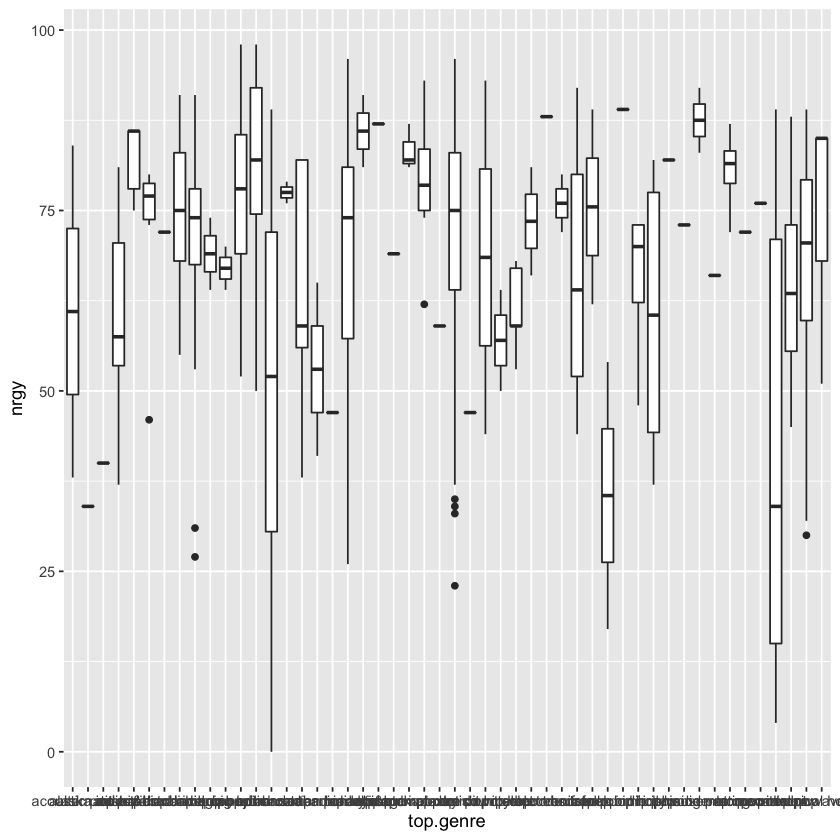

In [5]:
# Create a boxplot of the energy rank by genre
ggplot(top10s, aes(x = top.genre, y = nrgy)) + 
geom_boxplot()

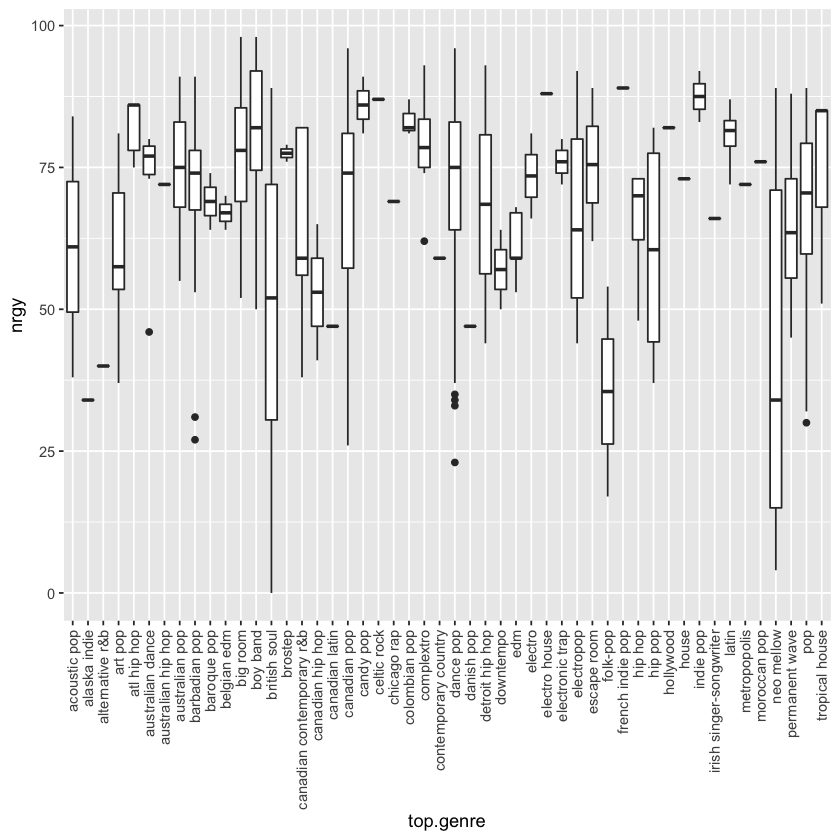

In [6]:
# Create a boxplot of the energy rank by genre
ggplot(top10s, aes(x = top.genre, y = nrgy)) + 
geom_boxplot() + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [7]:
# Which genres have the highest energy ranks, and which have the lowest?
top10s %>% group_by(top.genre) %>% summarise(Mean = mean(nrgy)) %>% arrange(Mean)

top.genre,Mean
<chr>,<dbl>
alaska indie,34.00000
folk-pop,35.50000
alternative r&b,40.00000
neo mellow,40.66667
canadian latin,47.00000
danish pop,47.00000
british soul,51.09091
canadian hip hop,53.00000
downtempo,57.00000


In [8]:
#Alaska Indie is the slowest.
top10s %>% group_by(top.genre) %>% summarise(Mean = mean(nrgy)) %>% arrange(desc(Mean))
#French Indie pop is the fastest.

top.genre,Mean
<chr>,<dbl>
french indie pop,89.00000
electro house,88.00000
indie pop,87.50000
celtic rock,87.00000
candy pop,86.00000
colombian pop,83.33333
atl hip hop,82.20000
hollywood,82.00000
latin,80.50000


In [9]:
#Find the median energy rank for all the genres for each year.
MedianDF <- top10s %>% group_by(year) %>% summarise(Median = median(nrgy))

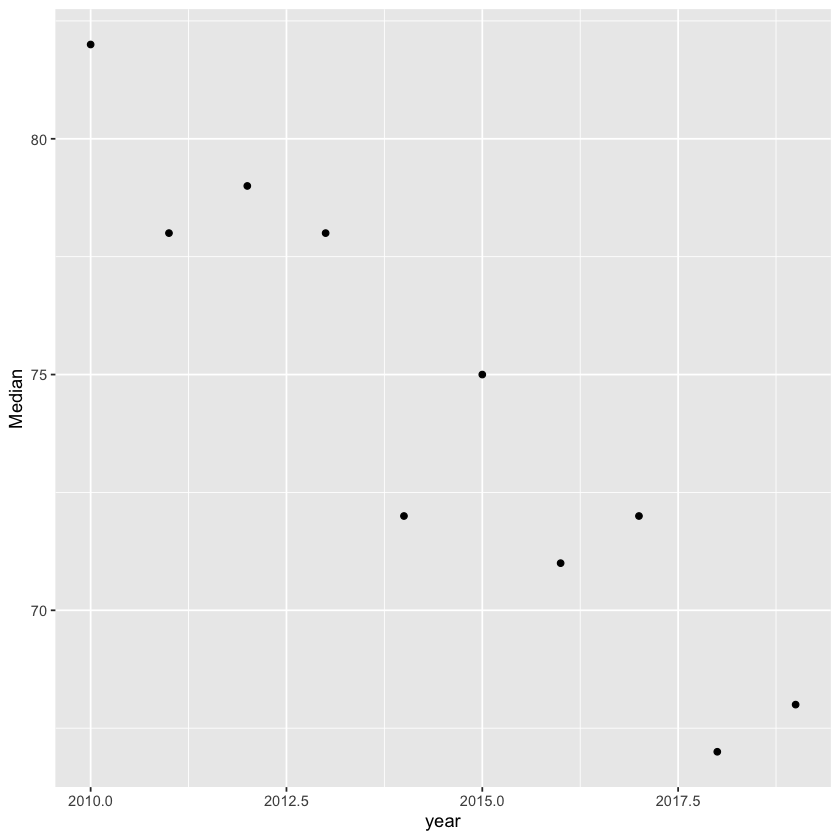

In [10]:
#Plot this median value for the years 2010-2019
ggplot(MedianDF, aes(x=year, y=Median)) + geom_point()

`geom_smooth()` using formula 'y ~ x'



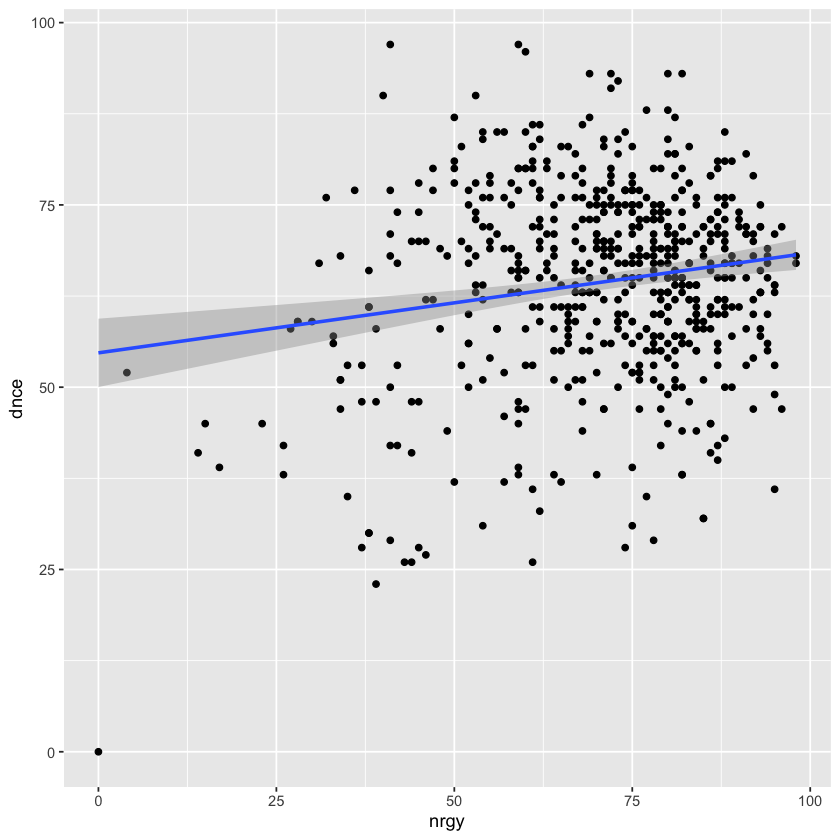

In [11]:
#Create a scatter plot of energy level versus danceability for all genres and all years.
ggplot(top10s, aes(x=nrgy, y=dnce)) + geom_point() + geom_smooth(method=lm)

In [12]:
# Is the energy level and danceability correlated?
cor.test(top10s$nrgy, top10s$dnce, method="pearson", use="complete.obs")
#It looks like the higher the energy, the more it's danceable. This looks significantly but slightly correlated, r=.17, p < .05.


	Pearson's product-moment correlation

data:  top10s$nrgy and top10s$dnce
t = 4.1577, df = 601, p-value = 3.682e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08854622 0.24379889
sample estimates:
      cor 
0.1672089 


`geom_smooth()` using formula 'y ~ x'



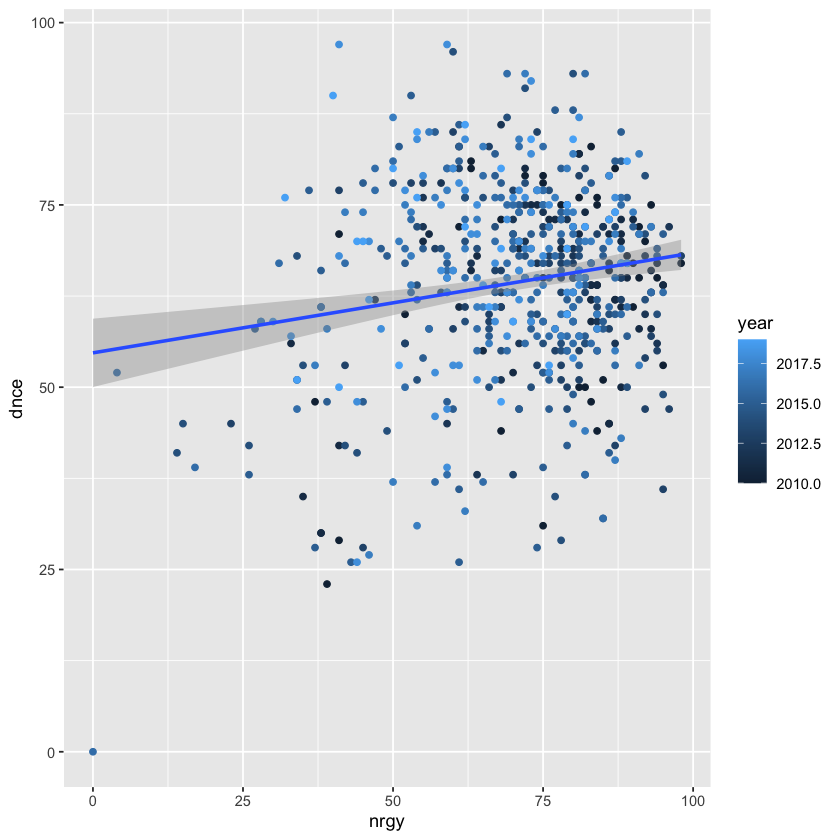

In [13]:
#Change the scatter plot to show the points for each year in a different color.
ggplot(top10s, aes(x=nrgy, y=dnce, color=year)) + geom_point() + geom_smooth(method=lm) 
#Does the relationship between the two variables change over time?

In [ ]:
# No, it does not seem to.

In [14]:
# Do a linear regression for those two variables.
regression <- lm(dnce ~ nrgy, top10s) 
summary(regression)
# How much variability does the line explain? 
#It explains 3% of the variability-see the Adjusted R-squared value.


Call:
lm(formula = dnce ~ nrgy, data = top10s)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.710  -7.682   0.827   8.875  36.667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 54.70998    2.38707  22.919  < 2e-16 ***
nrgy         0.13715    0.03299   4.158 3.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.2 on 601 degrees of freedom
Multiple R-squared:  0.02796,	Adjusted R-squared:  0.02634 
F-statistic: 17.29 on 1 and 601 DF,  p-value: 3.682e-05


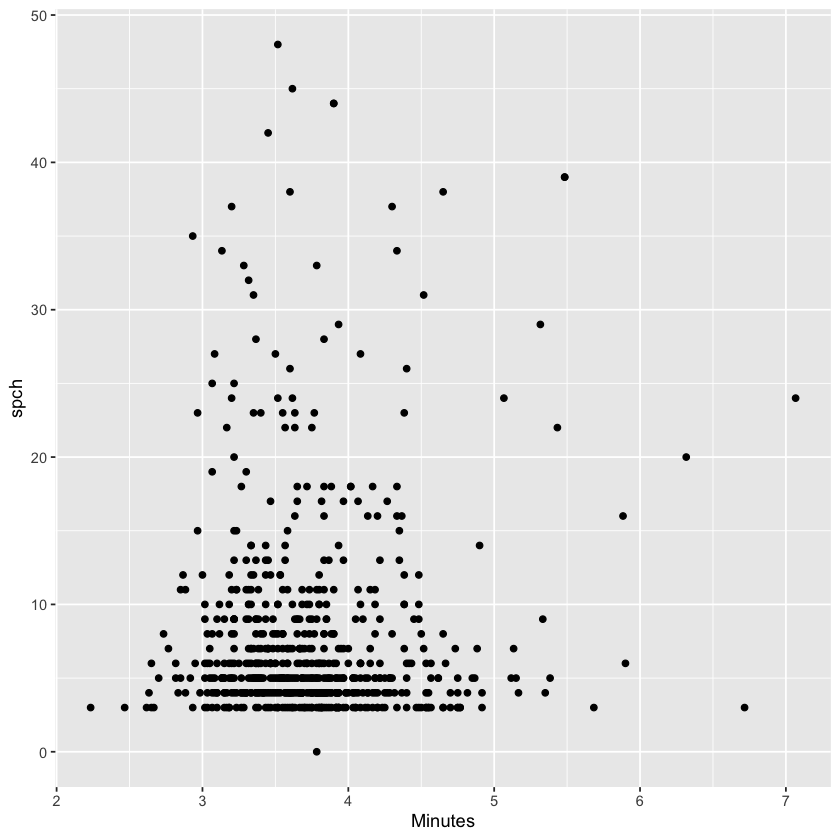

In [15]:
# The duration of the song is in seconds, which is hard for people to understand! 
# Convert it to minutes and then graph it to see how the number of minutes is related to the amount of speech in the song.
DurMin <- top10s %>% mutate(Minutes = dur / 60)
ggplot(DurMin, aes(x=Minutes, y=spch)) + geom_point()

In [16]:
# Create a data frame with just the rows from 2010.
Songs2010 <- top10s %>% filter(year == 2010) 
Songs2010Subset <- Songs2010[1:31,]

In [17]:
# Create a second data frame with just the rows from 2019
Songs2019 <- top10s %>% filter(year == 2019)

In [18]:
dim(Songs2010)
dim(Songs2010Subset)
dim(Songs2019)

[1] 51 15

[1] 31 15

[1] 31 15

In [19]:
#Use a paired t-test to see if the amount of speech has changed over time.
t.obj <- t.test(Songs2010Subset$spch, Songs2019$spch, paired=TRUE) 
t.obj


	Paired t-test

data:  Songs2010Subset$spch and Songs2019$spch
t = -0.41103, df = 30, p-value = 0.684
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.620917  3.072530
sample estimates:
mean of the differences 
             -0.7741935 


In [ ]:
# There is not a difference in speech by time for these two samples.

In [20]:
mean(Songs2010Subset$spch)
mean(Songs2019$spch)

[1] 7.354839

[1] 8.129032

In [21]:
sd(Songs2010Subset$spch)
sd(Songs2019$spch)

[1] 8.183513

[1] 7.017796